In [3]:
import pandas as pd
import numpy as np
import rdkit.Chem as Chem

In [10]:
DATA_PATH = './src/data/'
DATA = DATA_PATH + 'BindingDB_sample.tsv'

## Overview of columns related to the properties of the molecules

Let's have a global view of the columns of BindingDB. There is a total of 194 columns with data types including unsigned integers, floats, and strings.

In [ ]:
df = pd.read_csv(DATA, sep="\t", on_bad_lines='skip', dtype={
    "BindingDB Reactant_set_id": np.int32,
})
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 194 columns):
 #    Column                                                                Non-Null Count  Dtype  
---   ------                                                                --------------  -----  
 0    BindingDB Reactant_set_id                                             1000 non-null   int64  
 1    Ligand SMILES                                                         1000 non-null   object 
 2    Ligand InChI                                                          969 non-null    object 
 3    Ligand InChI Key                                                      969 non-null    object 
 4    BindingDB MonomerID                                                   1000 non-null   int64  
 5    BindingDB Ligand Name                                                 1000 non-null   object 
 6    Target Name                                                           1000 non-null   o

In [ ]:
'''
File name: 
Author: Aygul Bayramova
Date created: 14 November 2024
Date last modified: 14 November 2024
Python Version: 3.7
'''
def describe_column(column_name, print_types=True, print_uniques_values=True, print_missing_values=True):
    if column_name not in df.columns:
        raise ValueError("The column name is not in the dataframe")
    if print_types:
        print("Types of data in " + column_name + f" column: {df[column_name].apply(lambda x: type(x)).unique()}")
    if print_uniques_values:
        print("Number of unique values in " + column_name + f" column: {df[column_name].nunique()}")
    if print_missing_values:
        print("Number of missing values in " + column_name + f" column: {df[column_name].isnull().sum()}")
    return

### Zoom on "BindingDB Reactant_set_id"

In [23]:
import sys
sys.path.append('./src/utils')
from describe_column import describe_column

describe_column(df, "BindingDB Reactant_set_id", print_uniques_values=False, print_missing_values=True)

Types of data in BindingDB Reactant_set_id column: [<class 'int'>]
Number of missing values in BindingDB Reactant_set_id column: 0


As the maximum value in this column can be fitted in a 32-bit integer, our choice of specifying the data type upon opening the file is justified.

### Zoom on "Ligand SMILES"

In [43]:
describe_column("Ligand SMILES")

Types of data in Ligand SMILES column: [<class 'str'>]
Number of unique values in Ligand SMILES column: 996
Number of missing values in Ligand SMILES column: 0


The RDKit library allows us to work with Ligand SMILES column in a meaningful way

In [50]:
invalid_smiles = []
for mol in df["Ligand SMILES"]:
    if not Chem.MolFromSmiles(mol):
        invalid_smiles.append(mol)
print(f"Number of unique invalid SMILES: {len(set(invalid_smiles))}")

""" 
suppl = Chem.SmilesMolSupplier("generated/BindingDB_sample.tsv", delimiter="\t", titleLine=True, nameColumn=5, smilesColumn=1)
for mol in suppl:
    if mol is None:
        print("Invalid SMILES") 
"""

[20:52:44] Can't kekulize mol.  Unkekulized atoms: 18 19 21 22 24
[20:52:45] Explicit valence for atom # 30 N, 4, is greater than permitted


Number of unique invalid SMILES: 2


' \nsuppl = Chem.SmilesMolSupplier("generated/BindingDB_sample.tsv", delimiter="\t", titleLine=True, nameColumn=5, smilesColumn=1)\nfor mol in suppl:\n    if mol is None:\n        print("Invalid SMILES") \n'

It looks like some ligands cannot be processed by RDKit. But for those that can be processed, we get access to lots of potentially useful information

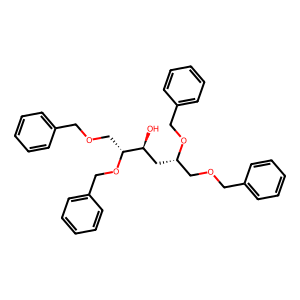

In [ ]:
# Example molecule
from rdkit.Chem import Draw

sample_molecule = Chem.MolFromSmiles(df["Ligand SMILES"].iloc[0])
Draw.MolToImage(sample_molecule)


In [55]:
from rdkit.Chem import Descriptors

print("Molecular weight of the first molecule: ", Descriptors.MolWt(sample_molecule))
print("Number of valence electrons of the first molecule: ", Descriptors.NumValenceElectrons(sample_molecule))

Molecular weight of the first molecule:  526.6730000000003
Number of valence electrons of the first molecule:  204


As this calculations take time, we may consider saving the results in a dedicated file.

### Zoom on "Ligand InChI" and "Ligand InChI Key" columns

In [56]:
describe_column("Ligand InChI")

Types of data in Ligand InChI column: [<class 'str'> <class 'float'>]
Number of unique values in Ligand InChI column: 965
Number of missing values in Ligand InChI column: 31


In [57]:
describe_column("Ligand InChI Key")

Types of data in Ligand InChI Key column: [<class 'str'> <class 'float'>]
Number of unique values in Ligand InChI Key column: 965
Number of missing values in Ligand InChI Key column: 31


### Zoom on "BindingDB MonomerID"

In [58]:
describe_column("BindingDB MonomerID")

Types of data in BindingDB MonomerID column: [<class 'int'>]
Number of unique values in BindingDB MonomerID column: 996
Number of missing values in BindingDB MonomerID column: 0


### Zoom on "BindingDB Ligand Name"

In [59]:
describe_column("BindingDB Ligand Name")

Types of data in BindingDB Ligand Name column: [<class 'str'>]
Number of unique values in BindingDB Ligand Name column: 996
Number of missing values in BindingDB Ligand Name column: 0


In [60]:
df["BindingDB Ligand Name"].head(10)

0    (2R,3S,5S)-1,2,5,6-tetrakis(benzyloxy)hexan-3-...
1    1-(4-(5-((4-aminopiperidin-1-yl)methyl)pyrrolo...
2                               US11564920, Example 11
3    Preparation of (2S,4R)-4-fluoro-N-([5-fluoro-4...
4    2-[4-(4'-chloro-4-sulfamoylbiphenyl-2-ylmethox...
5    CHEMBL284071::[(2-Hydroxy-phenyl)-(2-{(2-hydro...
6    4-(3-Difluoromethyl-5-phenyl-pyrazol-1-yl)-ben...
7    8-(2-(1-(biphenyl-4-yl)-2-methylpropan-2-ylami...
8    4-(2-(5-chloro-2,4- dimethoxyphenyl)imidazo[1,...
9    (5S)-6-(benzylamino)-5-[(4R)-4-[(4-chlorobenzo...
Name: BindingDB Ligand Name, dtype: object

Note the mix of different naming conventions (IUPAC, CHEMBL, ...) in this column.

### Zoom on "Target Name" and "Target Source Organism According to Curator or DataSource"

In [69]:
describe_column("Target Name")

Types of data in Target Name column: [<class 'str'>]
Number of unique values in Target Name column: 558
Number of missing values in Target Name column: 0


In [70]:
describe_column("Target Source Organism According to Curator or DataSource")

Types of data in Target Source Organism According to Curator or DataSource column: [<class 'str'> <class 'float'>]
Number of unique values in Target Source Organism According to Curator or DataSource column: 31
Number of missing values in Target Source Organism According to Curator or DataSource column: 342


There are much less targets than ligands.

<Axes: xlabel='Target Source Organism According to Curator or DataSource'>

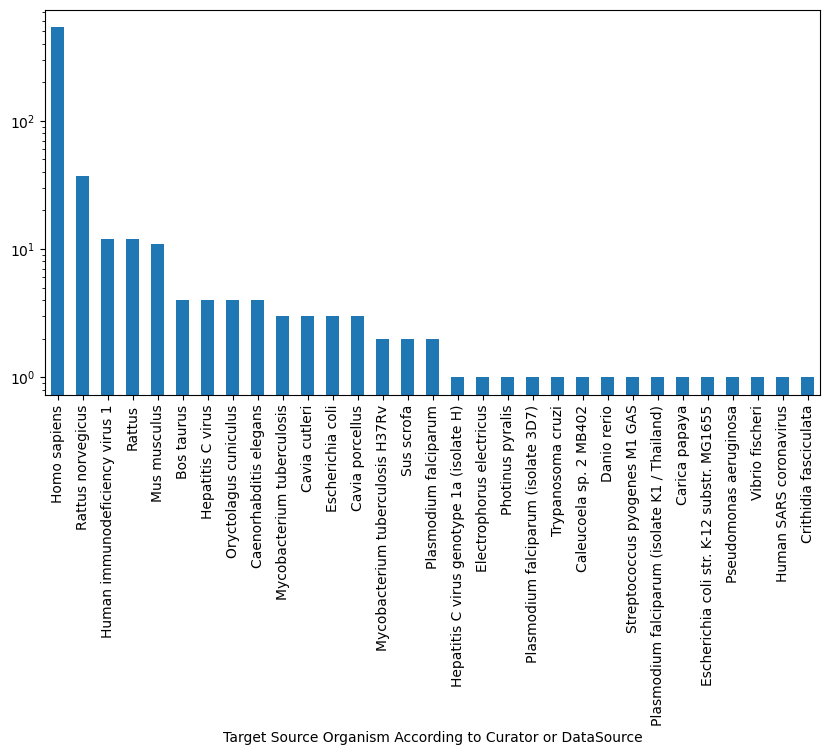

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
df["Target Source Organism According to Curator or DataSource"].value_counts().plot(kind="bar", logy=True)

Most of the targets are human proteins.